<a href="https://colab.research.google.com/github/AemyJutt/DiabetesDataAnalysis/blob/main/DiabetesDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiabetesDataAnalysis By Ahmad Raza

In [ ]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('diabetes.csv')

# Data Preprocessing Part 1

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
#0 values came in thickness thats not right its a nan value
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: SkinThickness, dtype: int64

In [ ]:
#bloodpressure can never be a zero so it is nan values
df['BloodPressure'].value_counts()

70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: BloodPressure, dtype: int64

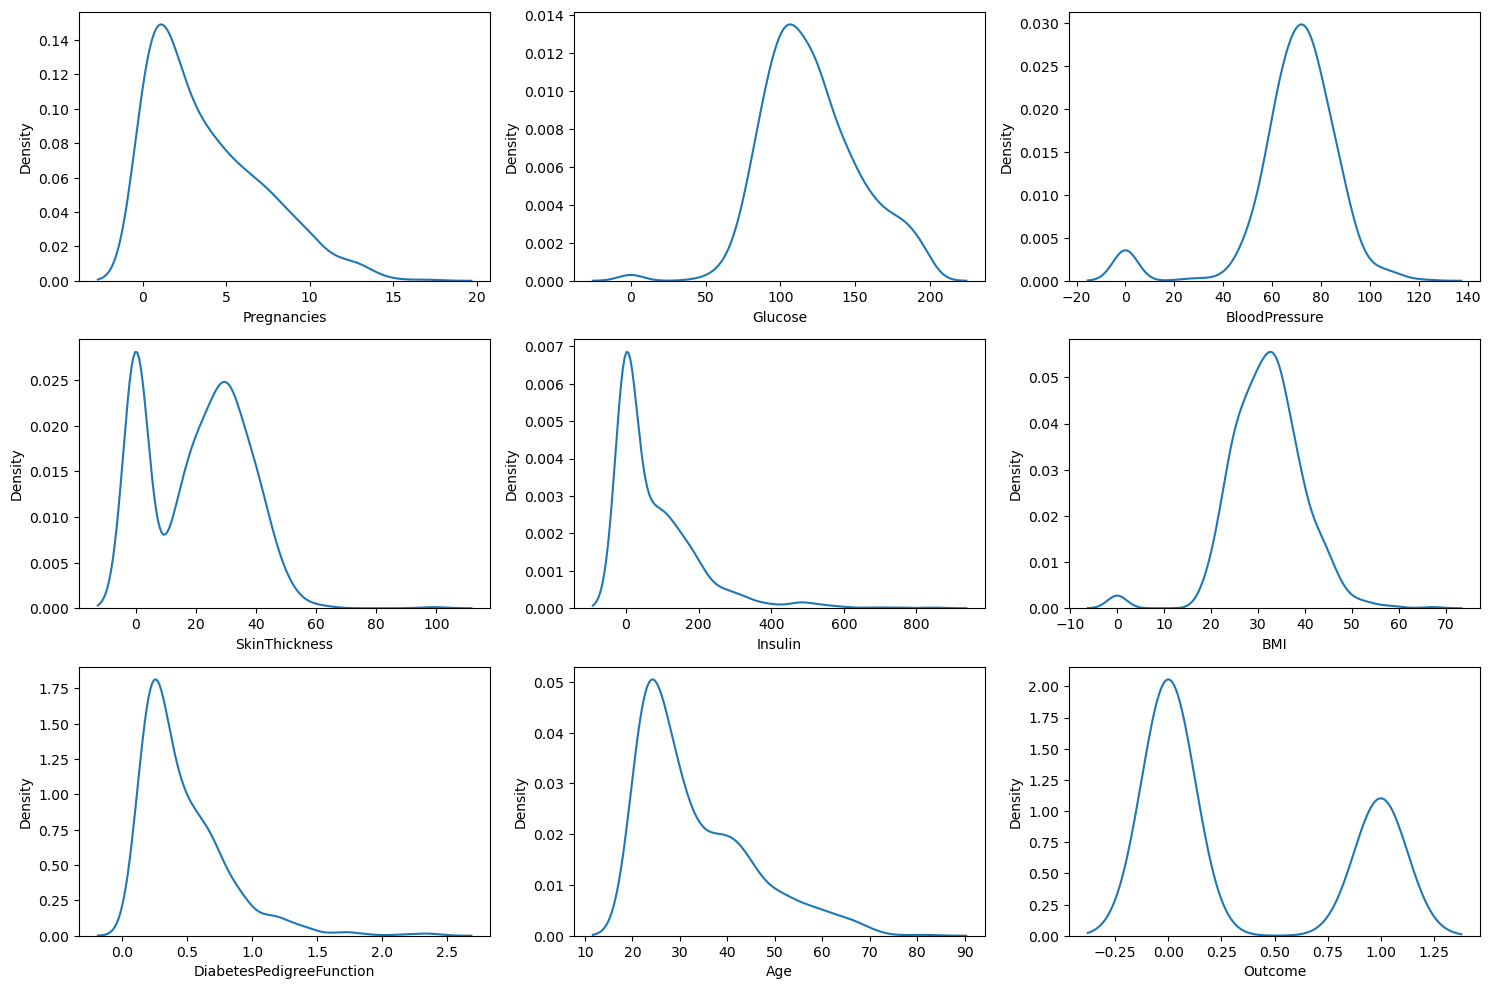

In [ ]:
#we need to draw kernal density estimation to saw 0 values in all features except outcome feature
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.kdeplot(x=var,data=df,ax=axs[i])

plt.tight_layout()
plt.show()

In [ ]:
#there is 0 values in every columns means surely its nan value

In [ ]:
#we need to replace that value to nan
df.replace({'Pregnancies':0,
            'Glucose':0,
            'BloodPressure':0,
            'SkinThickness':0,
            'Insulin':0,
            'BMI':0,
            'DiabetesPedigreeFunction':0,
            'Age':0},np.nan,inplace=True)

In [ ]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:
#we fill nan values in pregnancies feature using mode because mean or median change the ND shape
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mode()[0])

#mode used for  best shape of ND normal distribution
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mode()[0])

#mean and median shrink the shape of ND increase std that why i fill nan values with mode
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mode()[0])

#mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mode()[0])

#mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mode()[0])

#mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
df['Pregnancies'] = df['Pregnancies'].astype('int')
df['Glucose'] = df['Glucose'].astype('int')
df['SkinThickness'] = df['SkinThickness'].astype('int')
df['Insulin'] = df['Insulin'].astype('int')
df['BloodPressure'] = df['BloodPressure'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(5), int64(2)
memory usage: 39.1 KB


# Exploratary Data Analysis

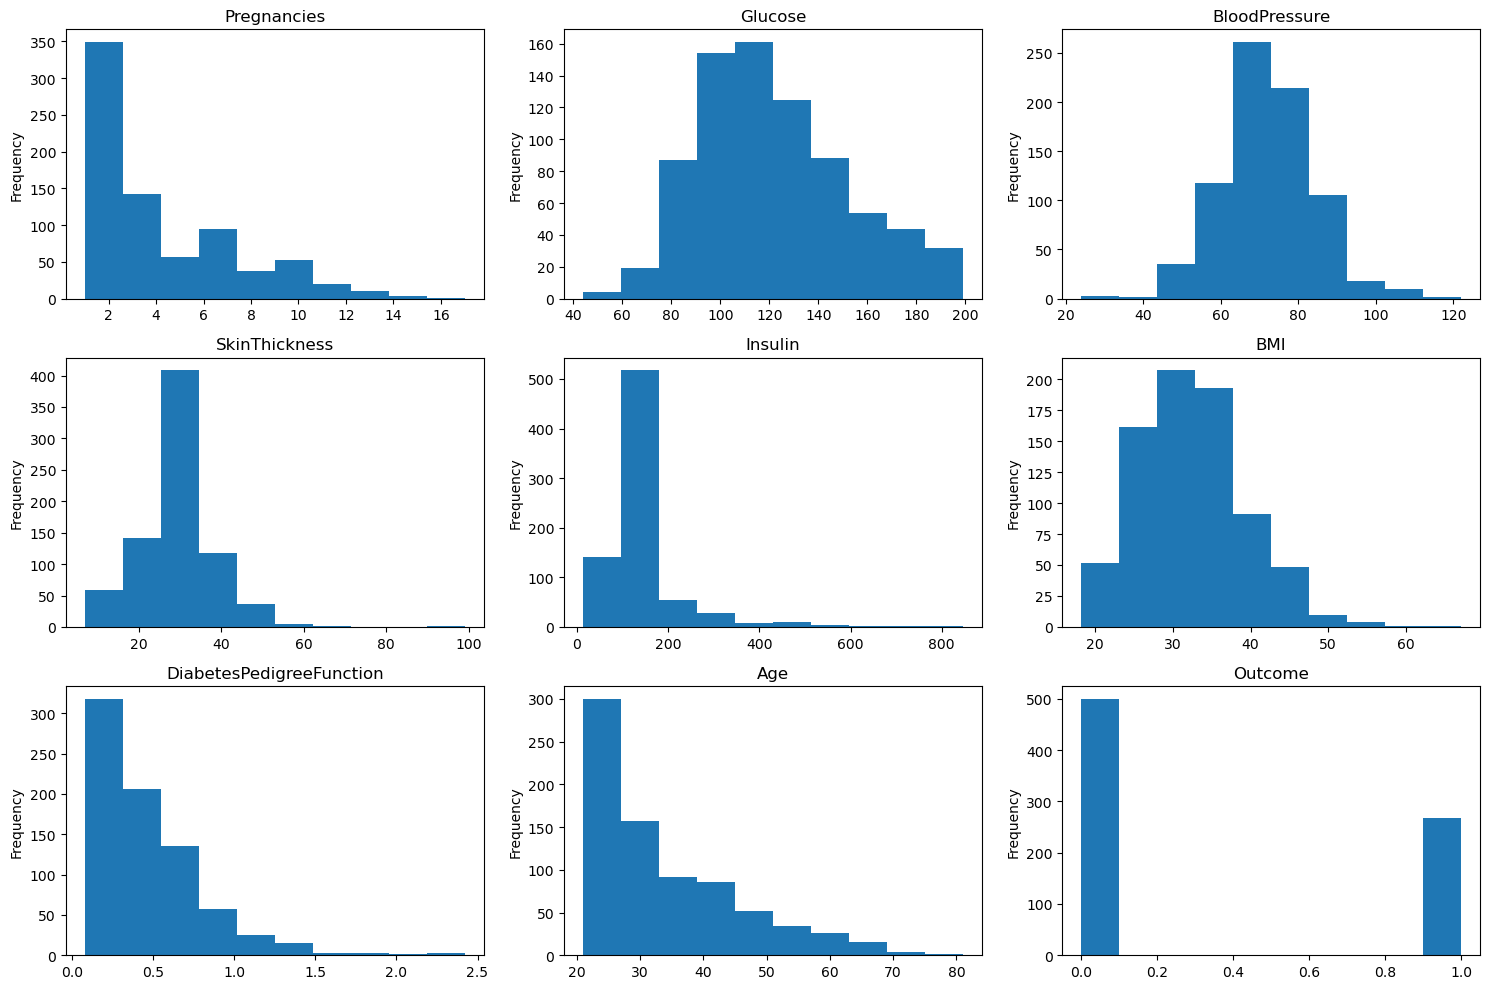

In [ ]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    df[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

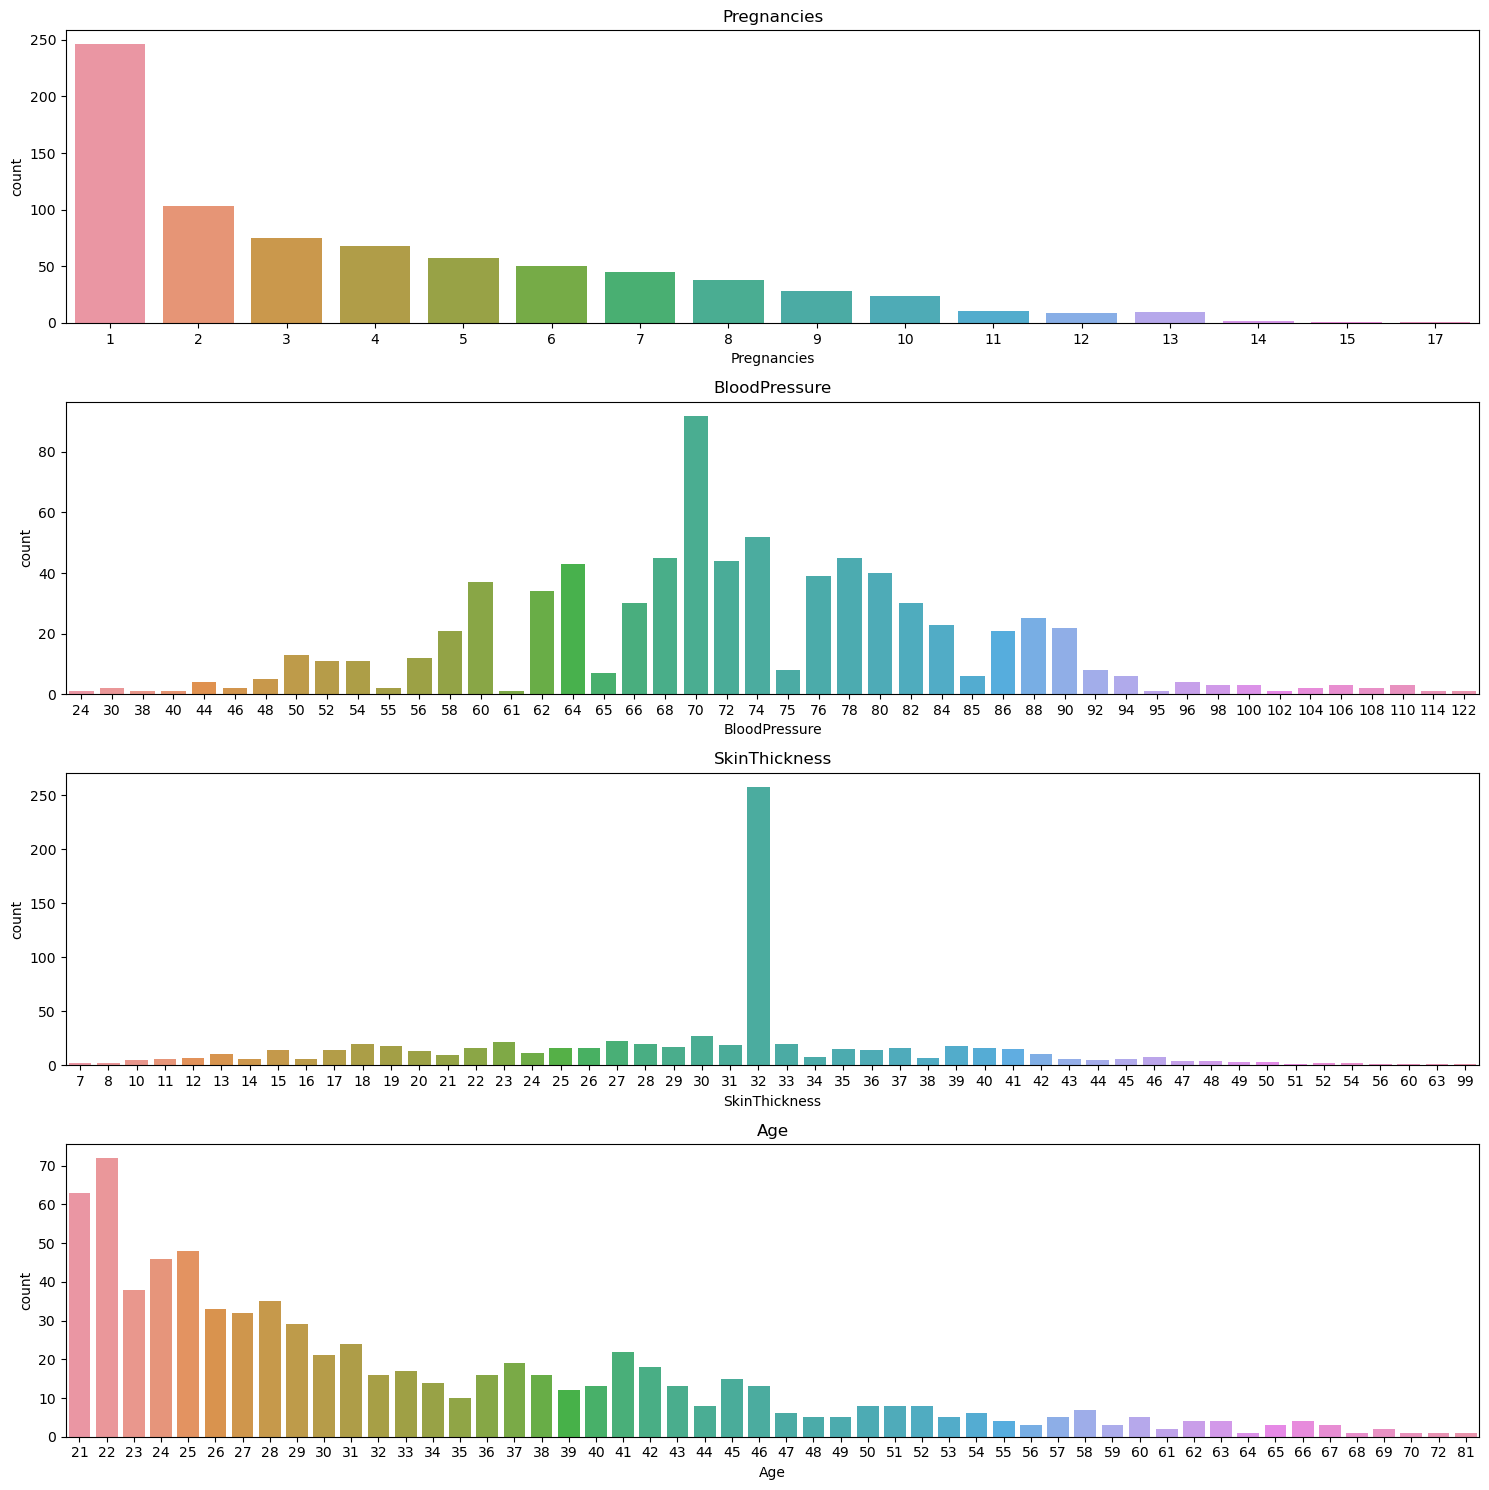

In [ ]:
int_vars = ['Pregnancies','BloodPressure','SkinThickness','Age']

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.countplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

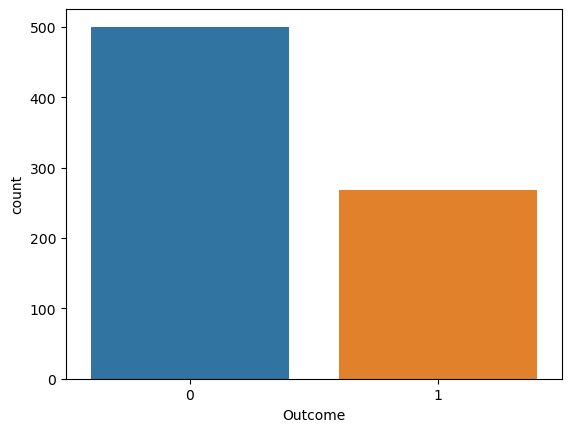

In [ ]:
sns.countplot(x=df['Outcome'],data=df)
plt.show()

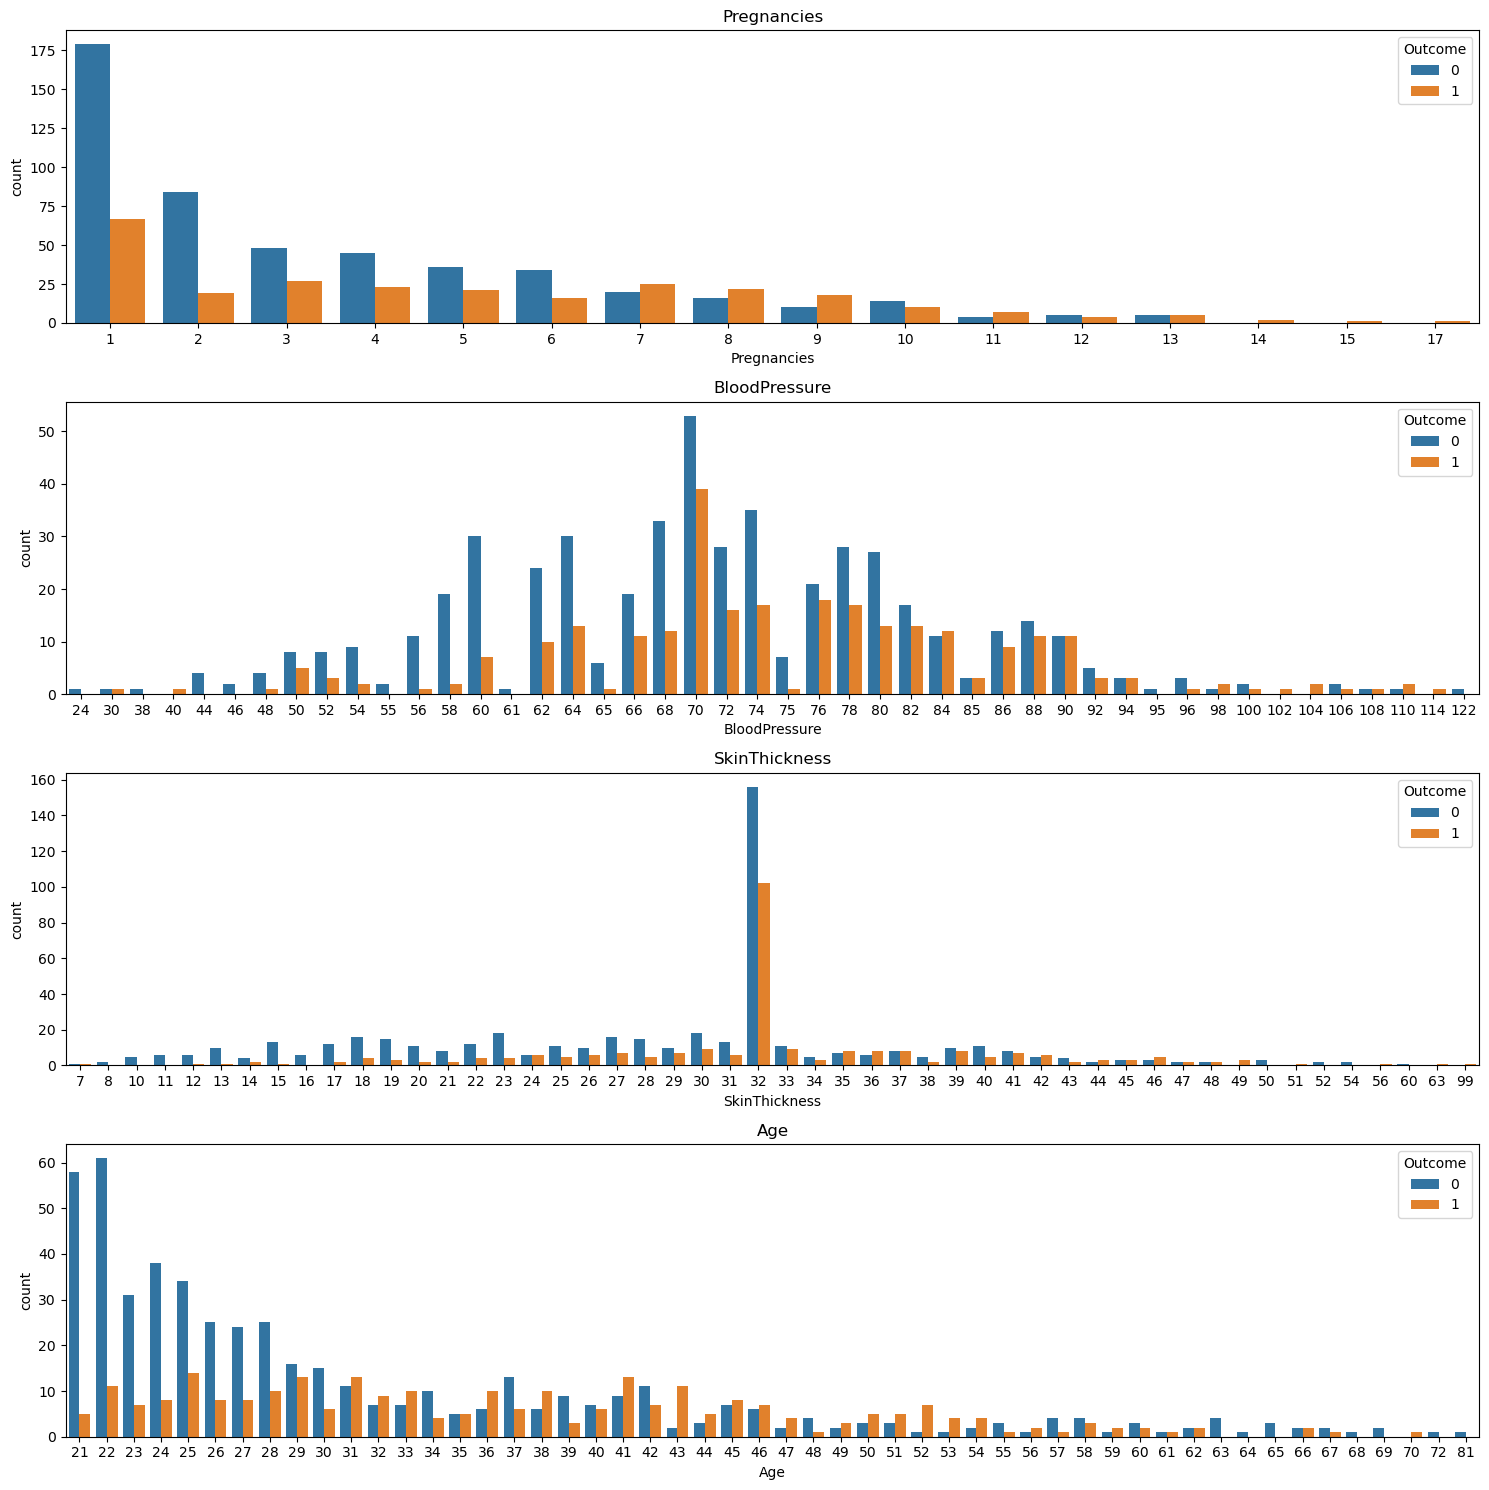

In [ ]:
#multivariant analysis
int_vars = ['Pregnancies','BloodPressure','SkinThickness','Age']

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15,15))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.countplot(x=var,data=df,hue='Outcome',ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

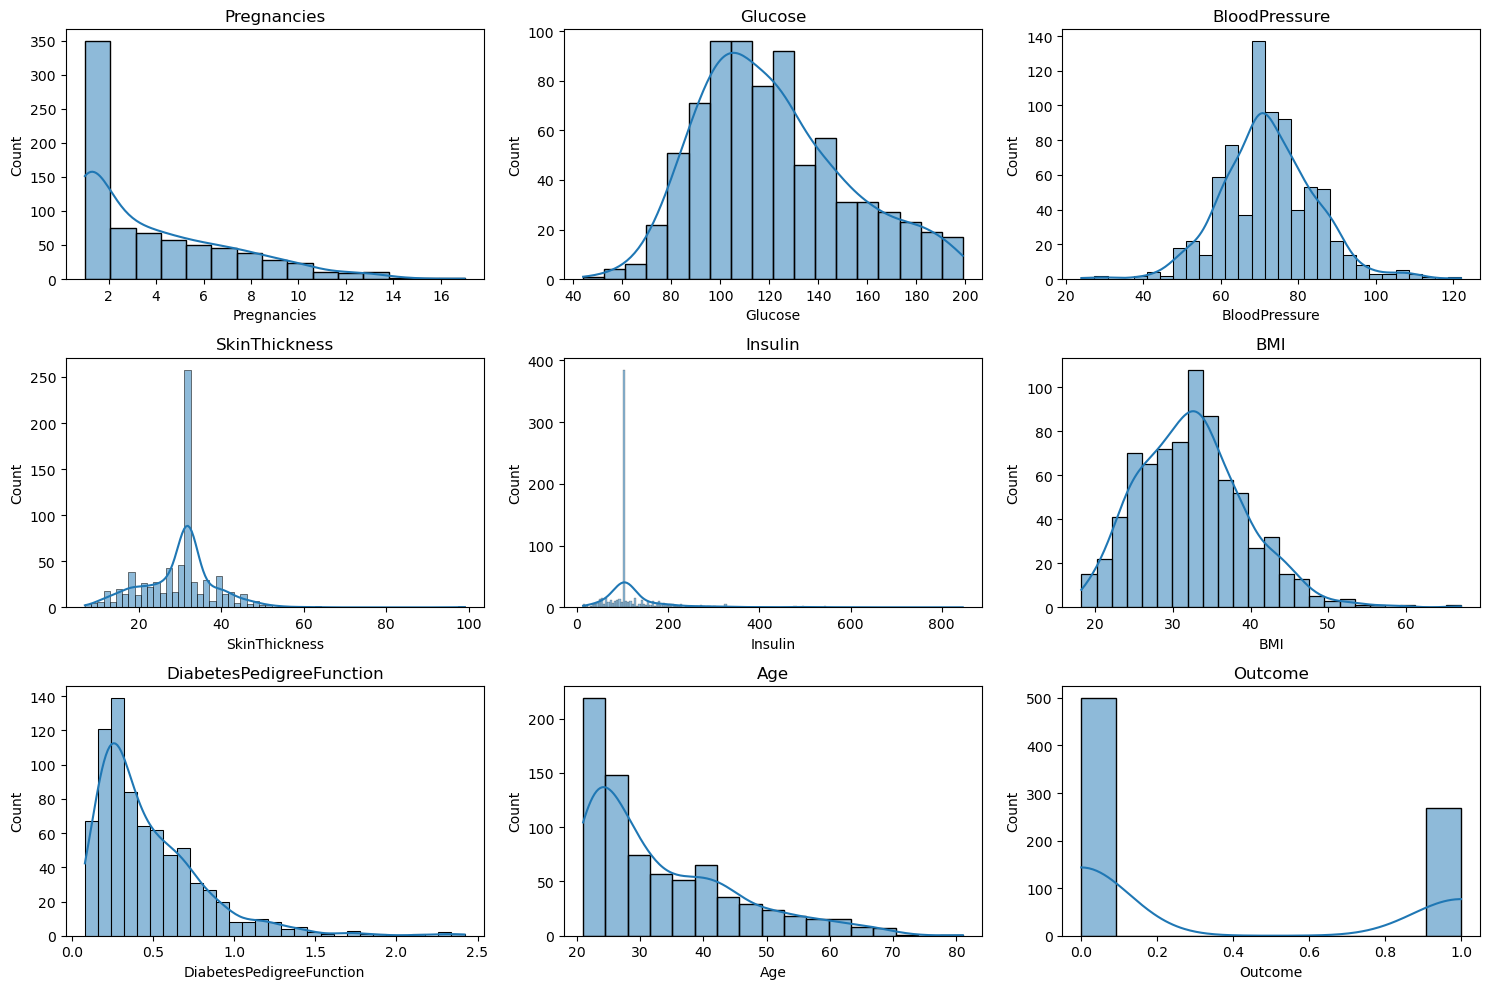

In [ ]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.histplot(x=var,data=df,kde=True,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

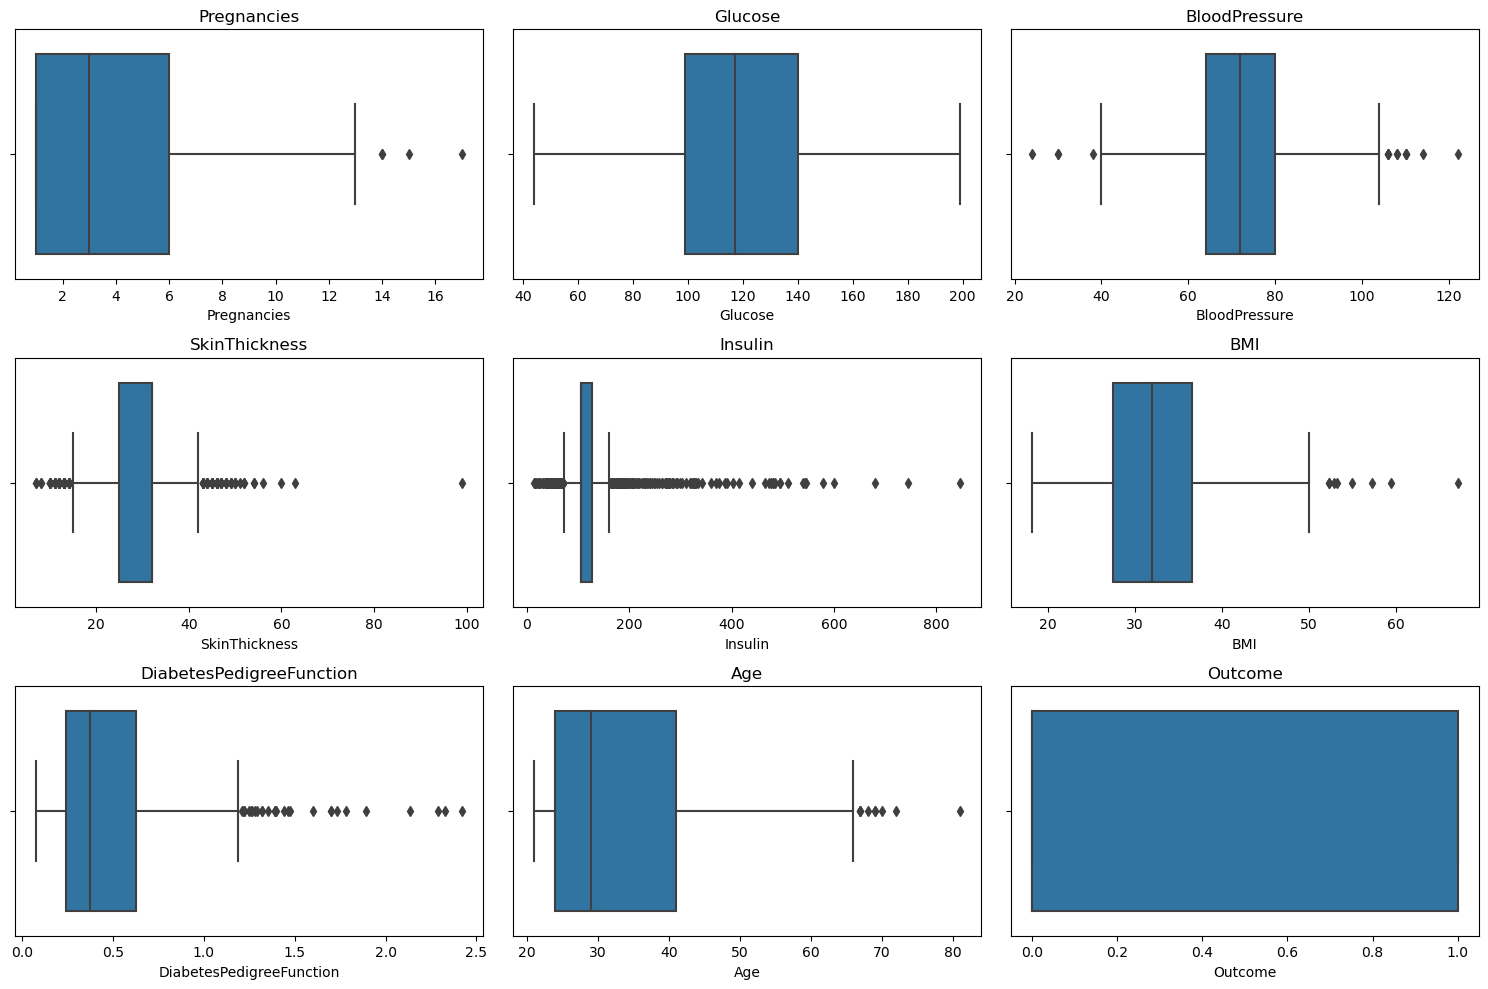

In [ ]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

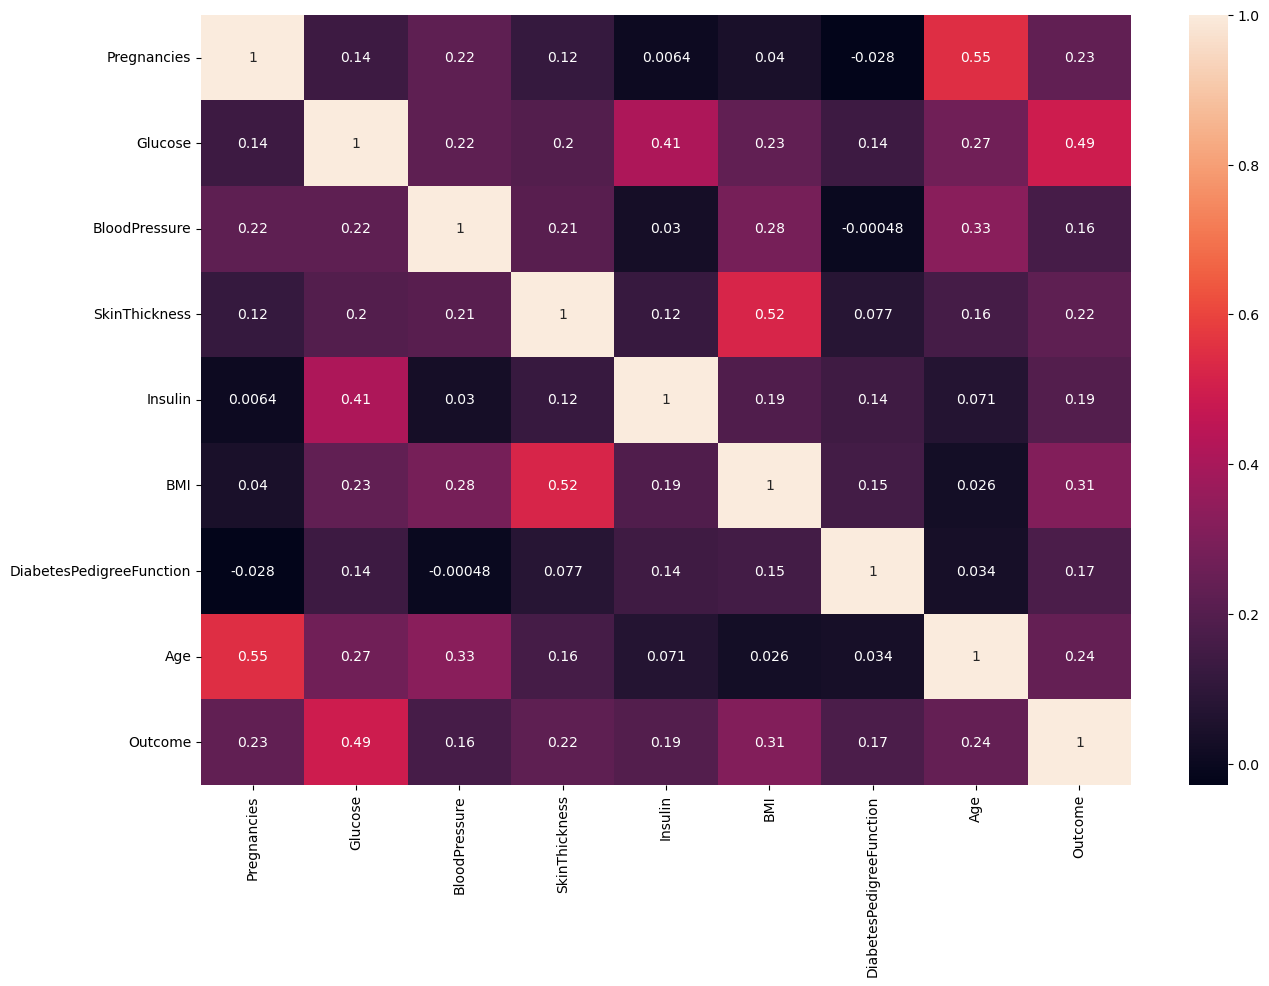

In [ ]:
#co_relation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),fmt='.2g',annot=True)
plt.show()

In [ ]:
Features_with_outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']

In [ ]:
def remove_outliers_iqr(data):

    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))

    return data[(data >= lower_bound) & (data <= upper_bound)]


In [ ]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

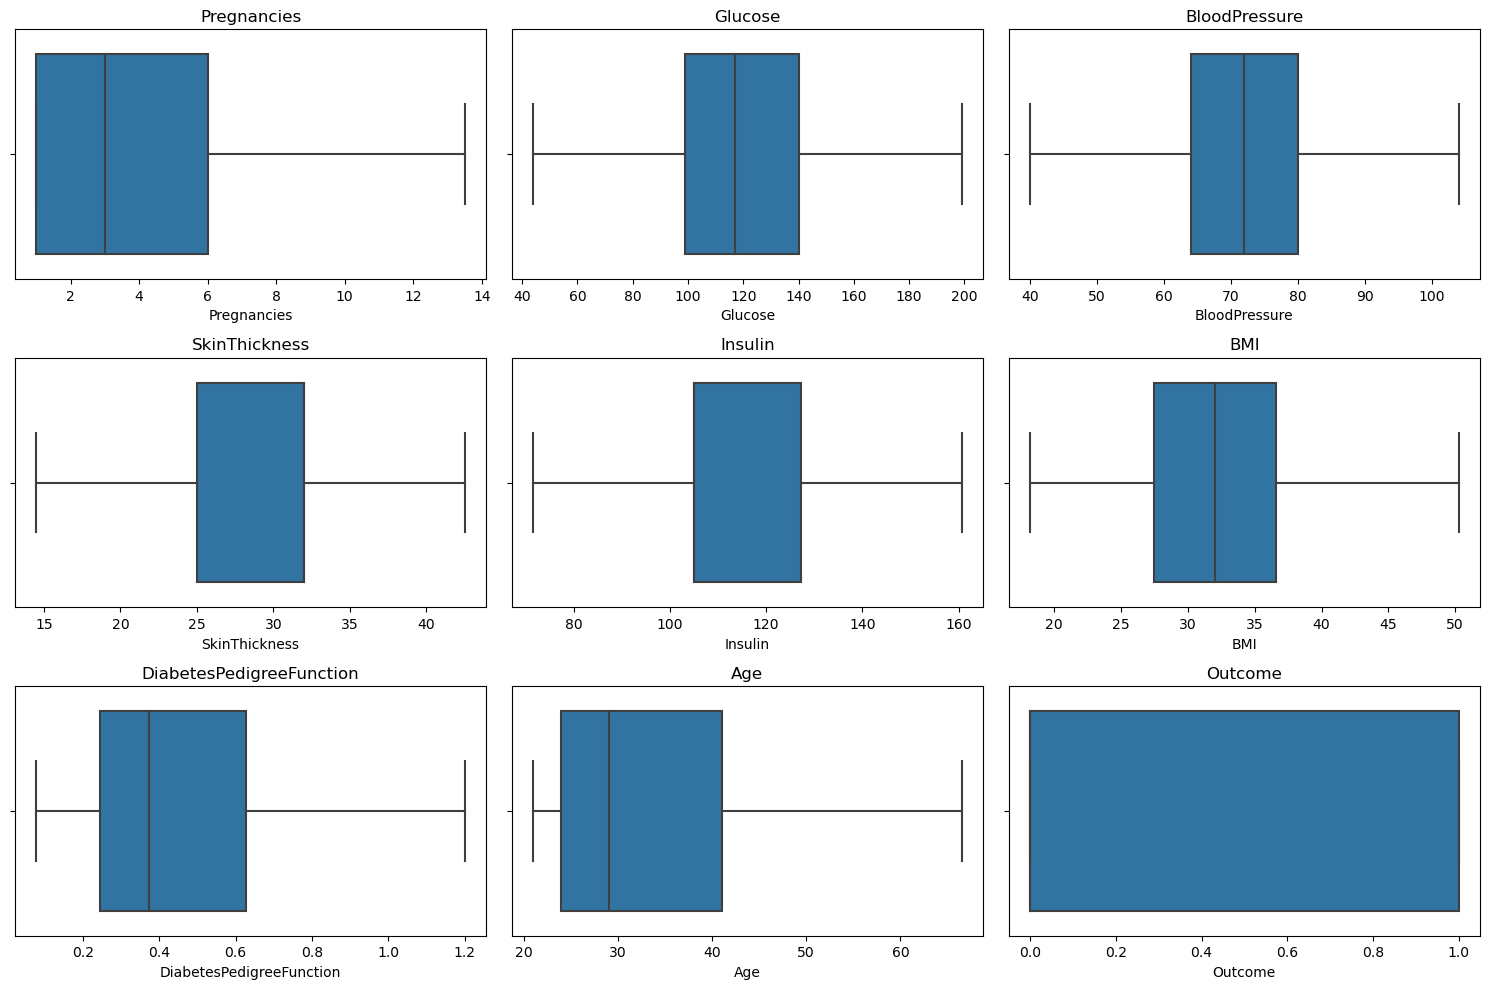

In [ ]:
#outliers detection
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=['Outcome'])  # Drop the 'target' column to get the features
y = df['Outcome']  # Scelect only the 'target' column as the target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()

In [ ]:
log_reg.fit(X_train,y_train)

C:\Users\~Aemy\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76
